In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
train_src = pd.read_csv("data/train.csv")
test_src = pd.read_csv("data/test.csv")
print('train shape', train_src.shape)
print('test shape', test_src.shape)

train shape (1460, 81)
test shape (1459, 80)


In [3]:
ntrain = train_src.shape[0]
ntest = test_src.shape[0]
y_train = train_src['SalePrice']

# combine data for EDA and value imputation
data = pd.concat((train_src, test_src), axis=0, sort=True).reset_index(drop=True)

# set column Id as index and remove as column as not informative
data.set_index('Id', drop=True, inplace=True)

# mark train and test samples for later separation
data['Set'] = np.repeat(['Train', 'Test'], repeats=[ntrain, ntest], axis=0)
trainflags = data['Set'] == 'Train'

In [4]:
def columnsWithNaNs(data):
    size = data.shape[0]
    numOfnulls = data.isnull().sum() # feature becoms index automatically
    numOfnullsTrain = data.loc[data['Set'] == 'Train'].isnull().sum()
    numOfnullsTest = data.loc[data['Set'] == 'Test'].isnull().sum()
    df = pd.DataFrame(numOfnulls, columns=['numOfNulls'])
    df.loc[:,'%'] = np.floor(((df['numOfNulls'] / size)*100))
    df.loc[:,'dtype'] = data.dtypes
    df.loc[:,'train %'] = np.floor(((numOfnullsTrain / ntrain)*100))
    df.loc[:,'test %'] = np.floor(((numOfnullsTest / ntest)*100))
    df.loc[:,'test %'] = np.floor(((numOfnullsTest / ntest)*100))
    return df.loc[df['numOfNulls'] > 0].sort_values(['dtype', 'numOfNulls'], ascending=False)

columnsWithNaNs(data)

,numOfNulls,%,dtype,train %,test %
PoolQC,2909,99.0,object,99.0,99.0
MiscFeature,2814,96.0,object,96.0,96.0
Alley,2721,93.0,object,93.0,92.0
Fence,2348,80.0,object,80.0,80.0
FireplaceQu,1420,48.0,object,47.0,50.0
GarageCond,159,5.0,object,5.0,5.0
GarageFinish,159,5.0,object,5.0,5.0
GarageQual,159,5.0,object,5.0,5.0
GarageType,157,5.0,object,5.0,5.0
BsmtCond,82,2.0,object,2.0,3.0


In [5]:
# data description mentions NaN means 'None' for those categorical features
data.PoolQC = data.PoolQC.fillna('None').astype('category')
data.Alley = data.Alley.fillna('None').astype('category')
data.Fence = data.Fence.fillna('None').astype('category')
data.FireplaceQu = data.FireplaceQu.fillna('None').astype('category')
data.GarageType = data.GarageType.fillna('None').astype('category')
data.GarageQual = data.GarageQual.fillna('None').astype('category')
data.GarageCond = data.GarageCond.fillna('None').astype('category')
data.GarageFinish = data.GarageFinish.fillna('None').astype('category')

data.BsmtQual  = data.BsmtQual.fillna('None').astype('category')
data.BsmtCond  = data.BsmtCond.fillna('None').astype('category')
data.BsmtExposure  = data.BsmtExposure.fillna('None').astype('category')
data.BsmtFinType1  = data.BsmtFinType1.fillna('None').astype('category')
data.BsmtFinType2  = data.BsmtFinType2.fillna('None').astype('category')

data.MasVnrType = data.MasVnrType.fillna('None').astype('category')

# numerical variables -> as NaN means most likely no garage etc. existent we replace with 0
data.GarageCars = data.GarageCars.fillna(0)
data.GarageArea = data.GarageArea.fillna(0)
data.MasVnrArea = data.MasVnrArea.fillna(0)

data.drop(columns='GarageYrBlt', inplace=True);

In [6]:
columnsWithNaNs(data)

,numOfNulls,%,dtype,train %,test %
MiscFeature,2814,96.0,object,96.0,96.0
MSZoning,4,0.0,object,0.0,0.0
Functional,2,0.0,object,0.0,0.0
Utilities,2,0.0,object,0.0,0.0
Electrical,1,0.0,object,0.0,0.0
Exterior1st,1,0.0,object,0.0,0.0
Exterior2nd,1,0.0,object,0.0,0.0
KitchenQual,1,0.0,object,0.0,0.0
SaleType,1,0.0,object,0.0,0.0
SalePrice,1459,49.0,float64,0.0,100.0


In [7]:
import math
def categoricalHistogramTrainVsTest(data, cols, gridW=5):
    n_cols = len(cols)
    gridH = math.ceil(n_cols/gridW)
    fig, ax_grid = plt.subplots(gridH, gridW, figsize=(20,gridH*2))
    ax = ax_grid.flatten()
    train = data.loc[data['Set'] == 'Train']
    test = data.loc[data['Set'] == 'Test']
    for i in range(n_cols):
        col = cols[i]
        train_counts = train[col].value_counts(dropna=False) # index consists now of the different objects (values) in the frame
        test_counts = test[col].value_counts(dropna=False) # index consists now of the different objects (values) in the frame
        #train_counts.loc['C (all)'] = fv
        counts = pd.concat([train_counts, test_counts], axis=1, sort=True)
        counts.columns = ['train', 'test']
        max_count = np.nanmax(counts.values)
        counts.plot(kind='bar', ax=ax[i])
        for p in ax[i].patches:
            ax[i].set_title(col)
            ax[i].annotate(str(int(p.get_height())), (p.get_x() + p.get_width()*0.5, p.get_height() + max_count*0.02), ha='center', rotation=90)

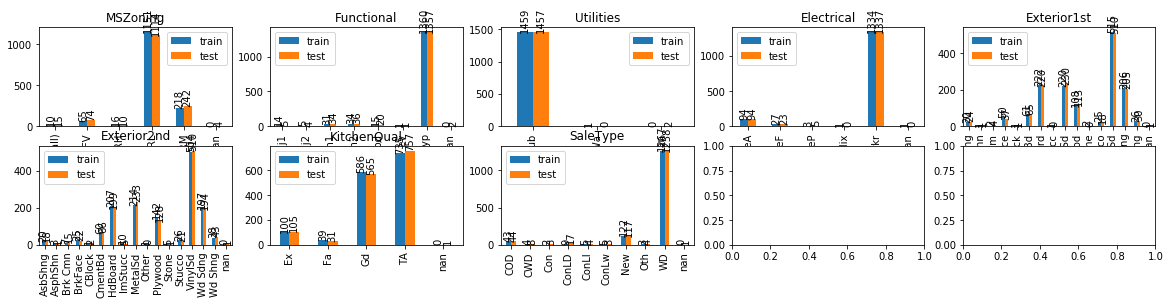

In [8]:
# Analyze categorical features with nan's first
residCatCols = [
    'MSZoning',
    'Functional',
    'Utilities',
    'Electrical',
    'Exterior1st',
    'Exterior2nd',
    'KitchenQual',
    'SaleType'
]
categoricalHistogramTrainVsTest(data, residCatCols)

There is a clear mode in most of the categorical features (except maybe KitchenQual). As there are only very few missing values we impute them with the mode.

In [9]:
for col in residCatCols:
    data = data.fillna({col: data[col].mode()[0]})
columnsWithNaNs(data)

,numOfNulls,%,dtype,train %,test %
MiscFeature,2814,96.0,object,96.0,96.0
SalePrice,1459,49.0,float64,0.0,100.0
LotFrontage,486,16.0,float64,17.0,15.0
BsmtFullBath,2,0.0,float64,0.0,0.0
BsmtHalfBath,2,0.0,float64,0.0,0.0
BsmtFinSF1,1,0.0,float64,0.0,0.0
BsmtFinSF2,1,0.0,float64,0.0,0.0
BsmtUnfSF,1,0.0,float64,0.0,0.0
TotalBsmtSF,1,0.0,float64,0.0,0.0


In [10]:
# fill with 0 as missing values are all from same two samples where BsmtFinType1 and 2 are None, which means no basement 
bsmt_columns = ['BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
data[bsmt_columns+['BsmtFinType1', 'BsmtFinType2']].loc[data['BsmtFullBath'].isna()]

,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFinType1,BsmtFinType2
Id,,,,,,,,
2121,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2189,NaN,NaN,0.0,0.0,0.0,0.0,None,None


In [11]:
data.loc[:, bsmt_columns] = data[bsmt_columns].fillna(0)
columnsWithNaNs(data)

,numOfNulls,%,dtype,train %,test %
MiscFeature,2814,96.0,object,96.0,96.0
SalePrice,1459,49.0,float64,0.0,100.0
LotFrontage,486,16.0,float64,17.0,15.0


In [12]:
# MiscFeature contains only 4% non-nan data in both sets. Therefore we remove it for the moment
data.drop('MiscFeature', axis=1, inplace=True)
# Same for LotFrontage. We may try to fit a separate regressor to impute the missing values here later
data.drop('LotFrontage', axis=1, inplace=True)

# Baseline model

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_predict
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import Matern

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [14]:
train_flags = data.Set == 'Train'
data_for_reg = pd.get_dummies(data.drop(columns='Set'))


train = data_for_reg[train_flags]
test = data_for_reg[train_flags == False]
X_train = train.drop(columns='SalePrice').values
y_train = train.SalePrice.values

est = GradientBoostingRegressor(n_estimators=500, max_depth=2, random_state=23, max_features="log2", loss='ls').fit(X_train, y_train)

pred = cross_val_predict(est, X_train, y_train, cv=5)

np.sqrt(mean_squared_log_error(y_train, pred))

0.1392277988704026

## Regression with GPR

In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor

def gpr(kernel, X_train=X_train, y_train=y_train):
    print('Training set size: %i' % len(X_train))
    gp = GaussianProcessRegressor(kernel=kernel, alpha=5e-9, optimizer='fmin_l_bfgs_b', 
                                n_restarts_optimizer=0, normalize_y=False, copy_X_train=True,
                                random_state=2016)
    clf = Pipeline([('scaler', StandardScaler()), ('gp', gp)]) 
    y_train_log = np.log1p(y_train)
    y_train_log_cent = y_train_log - np.mean(y_train_log)
    pred = cross_val_predict(clf, X_train, y_train_log_cent, cv=5, n_jobs=5)
    pred_uncent_exp = np.expm1(pred + np.mean(y_train_log))
    err = np.sqrt(mean_squared_log_error(y_train, pred_uncent_exp))
    print('Error: %.4f' % err)

### GP Regression with SE kernel ($l$ fixed to 1)

In [19]:
%%time
kernel = RBF(length_scale_bounds=(1, 1))
gpr(kernel)

Training set size: 1460
Error: 0.3990
CPU times: user 40 ms, sys: 50 ms, total: 90 ms
Wall time: 4.9 s


### GP Regression with SE kernel ($l$ = optimized)

In [39]:
kernel = RBF()
gpr(kernel)

Error: 0.1486


### GP Regression with Matérn kernel equivalent to SE ($l$ fixed to 1)
If nu goes to infinity, Matérn is equivalent to SE

In [43]:
_inf = 30 # values of nu bigger than 30 rise numerical issues... But 30 seems to be big enough to approximate Inf
kernel = Matern(length_scale_bounds=(1.0, 1.0), nu=_inf)
gpr(kernel)

Error: 0.3990


### GP Regression with Matérn kernel equivalent to SE ($l$ optimized)


In [94]:
kernel = 1.0**2 * Matern(length_scale=1.0, length_scale_bounds=(1e-05, 100000.0), nu=_inf)
gpr(kernel)

Error: 0.1736


### GP Regression with Matérn kernel more flexibel than SE ($l$ optimized)


In [95]:
kernel = 1.0**2 * Matern(length_scale=1.0, length_scale_bounds=(1e-05, 100000.0), nu=0.5)
gpr(kernel)

Error: 0.1317


In [63]:
def randomRatioOfIndexes(ratio):
    idx = np.arange(len(X_train))
    np.random.shuffle(idx)
    return idx[0:round(len(X_train)*ratio)]

In [92]:
kernel = 1.0**2 * Matern(length_scale=1.0, length_scale_bounds=(1e-05, 100000.0), nu=0.5)
idx = randomRatioOfIndexes(0.5)
gpr(kernel, X_train[idx], y_train[idx])

Error: 0.1330
